In [2]:
import numpy as np
from astrolab import imaging as im
import matplotlib.pyplot as plt


## Bradley Roth

In [3]:
image_28=im.load_image("/Users/soumit/Downloads/Astronomy/Sun Spots/20240628/1:30s/DSC_0959.JPG",print_log=False,stretch='linear')


In [4]:
def mask_sun(image_array, sun_threshold = 50):
    #creating a mask
    mask = ~(image_array<sun_threshold)
    # plt.hist(image_array.flatten())
    # plt.show()

    v=np.mean(mask,axis=0)  #vertical average
    v1=np.argwhere(v>0)

    h=np.mean(mask,axis=1)  #horizontal average
    h1=(np.argwhere(h>0))

    # display_mask= im.display(mask*image_array, stretch='linear')
    # plt.gca().axhline(h1[0], color='firebrick')
    # plt.gca().axvline(v1[0], color='firebrick')
    # plt.gca().axhline(h1[-1], color='firebrick')
    # plt.gca().axvline(v1[-1], color='firebrick')

    return h1[0],h1[-1], v1[0], v1[-1], mask

In [8]:
def b_roth(image_main ,threshold=8):

    image= np.array(image_main).astype(float)  #converting the image to an array

    left,right,top,bottom, mask = mask_sun(image)

    image = mask*image

    s=image.shape[1]//100
    t=threshold
    #image shape for our dslr is (4000,6000). This divides our horizontal axis [1] by 100 -> This number can be changed as per your requirments 

    #defining our window size in the format column/100
    
    #performing integral imaging
    int_image=np.cumsum(np.cumsum(image, axis=1), axis=0)  
    rows, cols= int_image.shape[:2]
    x,y= np.meshgrid(np.arange(cols), np.arange(rows))


    #turns x into an orderd set/ ordeers the array as per its order x11,x12,x13,......xMN
    x=x.ravel()                                           
    y=y.ravel()


    x_1=x-s//2          #rows
    x_2=x+s//2        
    y_1=y-s//2          #columns
    y_2=y+s//2


    x_1[x_1 < 0] = 0                     
    y_1[y_1 < 0] = 0                      
    x_2[x_2 >= cols] = cols-1             #creating a mask which prevents any value from exceeding 6000 (max columns you can have)   
    y_2[y_2 >= rows] = rows-1

    count= (x_2-x_1)*(y_2-y_1)

    sum= int_image[y_2,x_2] - int_image[(y_1-1),x_2] - int_image[y_2,(x_1-1)] + int_image[(y_1-1),(x_1-1)]

    result = np.ones(rows*cols, dtype=bool)
    result[image.ravel()*count <= sum*(100-t)/100.0] = False

    plt.xlabel('pixels')
    plt.ylabel('pixels')
 
    #displaying the image
    result = 500*np.reshape(result, (rows, cols)).astype(np.uint8)   
    display=plt.imshow(result, cmap='grey')
    
    

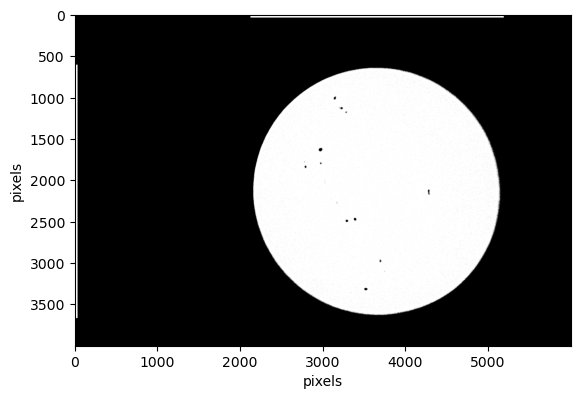

In [9]:

one=b_roth(image_main=im.load_image("/Users/soumit/Downloads/Astronomy/Sun Spots/20240628/1:30s/DSC_0959.JPG",print_log=False,stretch='linear'))


